🔹 Cell 1 — Title & description (markdown)

# 02 – Exploratory Data Analysis (EDA)

This notebook explores the melting point training data and the merged
Bradley + competition dataset.  

Goals:

- Understand the target distribution (`Tm`)
- Inspect SMILES and basic molecular properties
- Check group-count features (`Group1`…)
- Save a few summary plots/tables


🔹 Cell 2 — Imports & paths

In [23]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit import RDLogger

# Silence RDKit warnings
RDLogger.DisableLog("rdApp.*")

# ------------------------------------------------------------------
# Paths
# ------------------------------------------------------------------
# Notebook is in:  PROJECT_ROOT / "notebooks" / "02_EDA.ipynb"
PROJECT_ROOT = Path.cwd().resolve().parents[0]
DATA_RAW     = PROJECT_ROOT / "data" / "raw"
DATA_PROC    = PROJECT_ROOT / "data" / "processed"
FIG_DIR      = PROJECT_ROOT / "results" / "figures"

FIG_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("RAW:", DATA_RAW)
print("PROC:", DATA_PROC)


PROJECT_ROOT: C:\Users\hisuk\mol-desc-predictor
RAW: C:\Users\hisuk\mol-desc-predictor\data\raw
PROC: C:\Users\hisuk\mol-desc-predictor\data\processed


🔹 Cell 3 — Load raw + processed datasets

In [24]:
# Raw competition data
train_raw = pd.read_csv(DATA_RAW / "train.csv")


print("train_raw:", train_raw.shape)
display(train_raw.head())

# Merged + leakage-removed dataset from 01_Data_Preparation.ipynb
merged_path = DATA_PROC / "merged_dedup.csv"
if merged_path.exists():
    full_df = pd.read_csv(merged_path)
else:
    raise FileNotFoundError(
        f"{merged_path} not found. "
        "Run 01_Data_Preparation.ipynb / build_base_dataset() first."
    )

print("full_df (train + external, deduped):", full_df.shape)
display(full_df.head())


train_raw: (2662, 427)


,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


full_df (train + external, deduped): (19617, 427)


,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175.0,FC1=C(F)C(F)(F)C1(F)F,213.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1222.0,c1ccc2c(c1)ccc1[nH]c3ccccc3c12,407.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2994.0,CCn1c(C)nc2ccccc21,324.15,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1704.0,CC#CC(=O)O,351.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2526.0,CCCCC(C)S,126.15,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


🔹 Cell 4 — Basic info & missing values

In [25]:
def summarize_df(name: str, df: pd.DataFrame):
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)
    print("\nColumns:")
    print(df.dtypes.head(20))
    print("\nMissing values (top 20):")
    print(df.isna().sum().sort_values(ascending=False).head(20))

summarize_df("train_raw", train_raw)
summarize_df("full_df (merged_dedup)", full_df)



=== train_raw ===
Shape: (2662, 427)

Columns:
id            int64
SMILES       object
Tm          float64
Group 1       int64
Group 2       int64
Group 3       int64
Group 4       int64
Group 5       int64
Group 6       int64
Group 7       int64
Group 8       int64
Group 9       int64
Group 10      int64
Group 11      int64
Group 12      int64
Group 13      int64
Group 14      int64
Group 15      int64
Group 16      int64
Group 17      int64
dtype: object

Missing values (top 20):
id           0
Group 291    0
Group 289    0
Group 288    0
Group 287    0
Group 286    0
Group 285    0
Group 284    0
Group 283    0
Group 282    0
Group 281    0
Group 280    0
Group 279    0
Group 278    0
Group 277    0
Group 276    0
Group 275    0
Group 274    0
Group 273    0
Group 272    0
dtype: int64

=== full_df (merged_dedup) ===
Shape: (19617, 427)

Columns:
id          float64
SMILES       object
Tm          float64
Group 1     float64
Group 2     float64
Group 3     float64
Group 4     float

🔹 Cell 5 — Target (Tm) distribution

count    2662.000000
mean      278.263452
std        85.117914
min        53.540000
25%       217.000000
50%       277.300000
75%       325.150000
max       897.150000
Name: Tm, dtype: float64

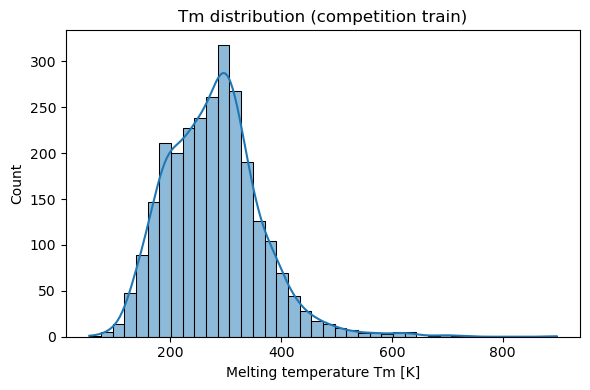

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(train_raw["Tm"], bins=40, kde=True)
plt.title("Tm distribution (competition train)")
plt.xlabel("Melting temperature Tm [K]")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIG_DIR / "eda_tm_hist_train.png", dpi=150)

train_raw["Tm"].describe()


count    19617.000000
mean       382.876266
std         91.273217
min         53.540000
25%        325.150000
50%        384.650000
75%        445.150000
max       1077.150000
Name: Tm, dtype: float64

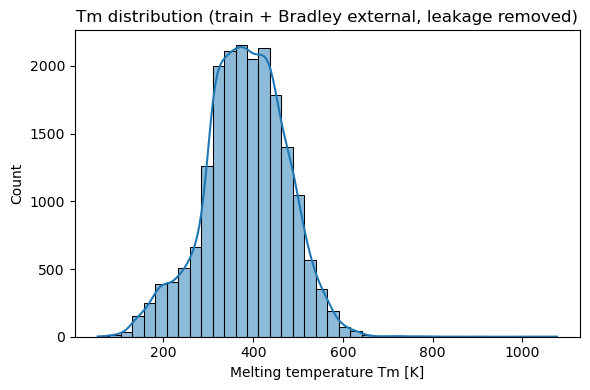

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(full_df["Tm"], bins=40, kde=True)
plt.title("Tm distribution (train + Bradley external, leakage removed)")
plt.xlabel("Melting temperature Tm [K]")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIG_DIR / "eda_tm_hist_full.png", dpi=150)

full_df["Tm"].describe()

🔹 Cell 6 — SMILES length & basic checks


--- train_raw SMILES length ---
count    2662.000000
mean       15.655522
std         7.284963
min         2.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        78.000000
Name: SMILES, dtype: float64

--- full_df SMILES length ---
count    19617.000000
mean        28.890605
std         16.623302
min          1.000000
25%         18.000000
50%         25.000000
75%         36.000000
max        290.000000
Name: SMILES, dtype: float64


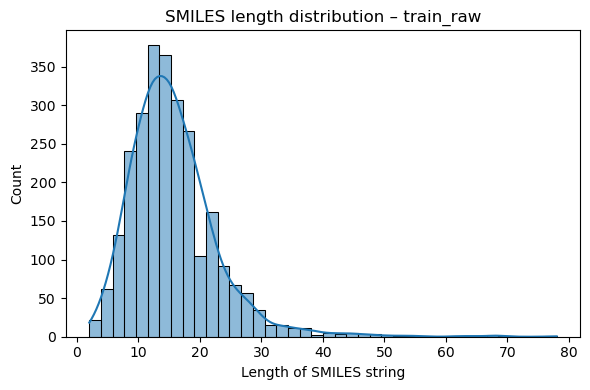

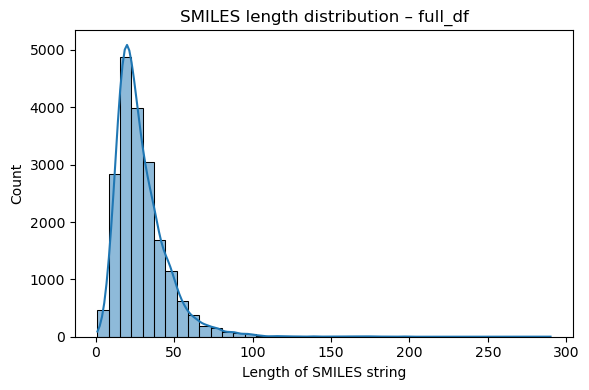

In [28]:
for df_name, df in [("train_raw", train_raw), ("full_df", full_df)]:
    smiles_len = df["SMILES"].astype(str).str.len()
    print(f"\n--- {df_name} SMILES length ---")
    print(smiles_len.describe())

    plt.figure(figsize=(6, 4))
    sns.histplot(smiles_len, bins=40, kde=True)
    plt.title(f"SMILES length distribution – {df_name}")
    plt.xlabel("Length of SMILES string")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"eda_smiles_len_{df_name}.png", dpi=150)


In [29]:
for name, df in [
    ("train_raw", train_raw),
    ("full_df (train + external, deduped)", full_df)
]:
    bad = count_invalid_smiles(df)
    print(f"{name}: invalid / unparsable SMILES = {bad} rows")



train_raw: invalid / unparsable SMILES = 0 rows
full_df (train + external, deduped): invalid / unparsable SMILES = 1 rows


🔹 Cell 7 — Group feature overview (from merged_dedup)

In [30]:
group_cols = [c for c in full_df.columns if c.startswith("Group")]
print(f"Number of Group columns: {len(group_cols)}")

full_df[group_cols].head()


Number of Group columns: 424


,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


count    19617.000000
mean         1.226589
std          3.583183
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: Group_total, dtype: float64


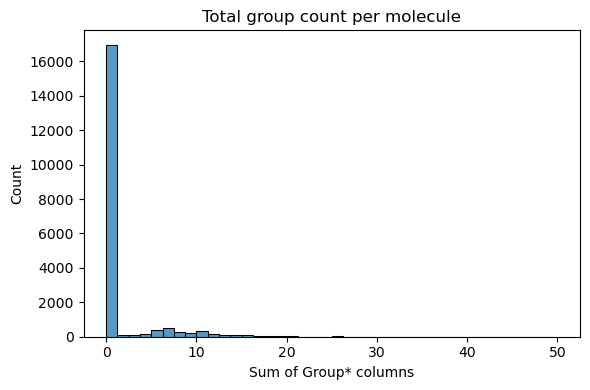

In [31]:
# Total group count per molecule
full_df["Group_total"] = full_df[group_cols].sum(axis=1)

print(full_df["Group_total"].describe())

plt.figure(figsize=(6, 4))
sns.histplot(full_df["Group_total"], bins=40, kde=False)
plt.title("Total group count per molecule")
plt.xlabel("Sum of Group* columns")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIG_DIR / "eda_group_total_hist.png", dpi=150)


In [32]:
# Frequency of top groups across molecules
group_sums = full_df[group_cols].sum(axis=0).sort_values(ascending=False)
group_sums.head(20)


Group 15     6208.0
Group 2      4204.0
Group 1      2711.0
Group 168     904.0
Group 20      497.0
Group 16      350.0
Group 123     333.0
Group 3       306.0
Group 18      276.0
Group 29      249.0
Group 130     227.0
Group 21      220.0
Group 169     202.0
Group 326     198.0
Group 30      184.0
Group 17      178.0
Group 401     176.0
Group 221     171.0
Group 53      166.0
Group 19      159.0
dtype: float64

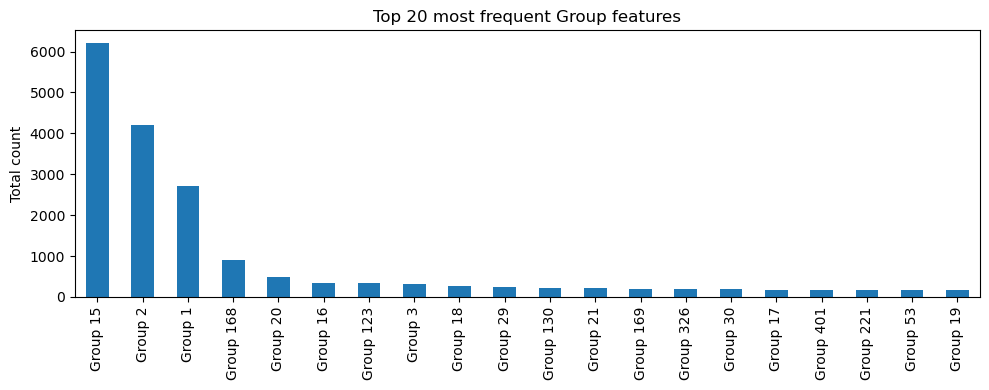

In [33]:
plt.figure(figsize=(10, 4))
top_k = 20
group_sums.head(top_k).plot(kind="bar")
plt.title(f"Top {top_k} most frequent Group features")
plt.ylabel("Total count")
plt.tight_layout()
plt.savefig(FIG_DIR / "eda_group_topk.png", dpi=150)


🔹 Cell 8 — Correlation between Tm and simple group summary features

In [34]:
# Simple aggregate group features
full_df["Group_nonzero"] = (full_df[group_cols] > 0).sum(axis=1)
full_df["Group_max"]     = full_df[group_cols].max(axis=1)

corr_cols = ["Tm", "Group_total", "Group_nonzero", "Group_max"]
corr = full_df[corr_cols].corr()

corr


,Tm,Group_total,Group_nonzero,Group_max
Tm,1.000000,-0.313509,-0.384923,0.371099
Group_total,-0.313509,1.000000,0.889176,0.847926
Group_nonzero,-0.384923,0.889176,1.000000,0.031492
Group_max,0.371099,0.847926,0.031492,1.000000


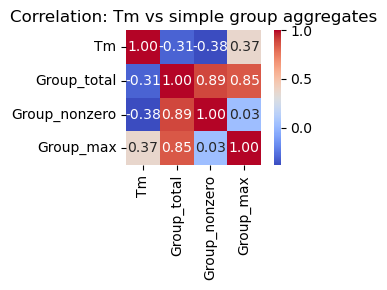

In [35]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation: Tm vs simple group aggregates")
plt.tight_layout()
plt.savefig(FIG_DIR / "eda_corr_tm_group_agg.png", dpi=150)


🔹 Cell 09 — Small textual summary (markdown)

## Key EDA Insights

### Target: Melting Temperature (Tm)
- Original training set has mean ~278 K with a heavy right-skewed tail.
- After adding the Bradley external dataset (and safely removing test leakage),
  the dataset grows from ~2.6k → ~19.6k rows.
- The target becomes better distributed, with mean ~383 K and smoother coverage.
- This significantly improves data diversity and should help generalization.

---

### SMILES Structure Complexity
- Competition train SMILES strings are relatively short (mean ~15 chars).
- Extended dataset molecules are much more complex (mean ~29 chars, max 290).
- Indicates richer chemistry and larger molecular graphs.
- Justifies converting SMILES into:
  - RDKit descriptors
  - Morgan fingerprints

---

### Group Features
- Group feature space is extremely sparse.
- Most molecules have 0–1 active groups; a tiny minority have many.
- A few groups dominate frequency; long-tail distribution exists.
- Supports strong feature selection and tree-based modelling.

---

### Correlation Observations
- `Group_total` and `Group_nonzero` correlate **negatively** with Tm.
- `Group_max` correlates **positively** with Tm.
- Suggests melting point is influenced by *specific strong functional groups*,
  rather than simply counting how many groups exist.
- Confirms nonlinear models are appropriate.

---

### Overall Conclusion
The dataset exhibits:
- meaningful chemical diversity
- strong nonlinear signal
- sparse and heavy-tailed feature spaces

This justifies the chosen pipeline:
1) RDKit descriptors + Morgan fingerprints  
2) Sparse matrix handling  
3) LightGBM / XGBoost models  
4) Feature reduction before modeling
